## InClass

#### import required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose, STL

#### Read Petrol. csv file

In [ ]:
 df = pd.read_csv('Petrol.csv')

In [ ]:
df.shape

(51, 3)

In [ ]:
df.head()

,Year,Quarter,Consumption
0,2001,Q1,14.978
1,2001,Q2,11.099
2,2001,Q3,10.057
3,2001,Q4,10.454
4,2002,Q1,9.295


In [ ]:
df.tail()

,Year,Quarter,Consumption
46,2012,Q3,0.88818
47,2012,Q4,0.99804
48,2013,Q1,0.84120
49,2013,Q2,0.74032
50,2013,Q3,0.72823


#### convert the given data into time series

In [ ]:
date = pd.date_range(start='1/1/2001', end='30/9/2013', freq='Q')
date

DatetimeIndex(['2001-03-31', '2001-06-30', '2001-09-30', '2001-12-31',
               '2002-03-31', '2002-06-30', '2002-09-30', '2002-12-31',
               '2003-03-31', '2003-06-30', '2003-09-30', '2003-12-31',
               '2004-03-31', '2004-06-30', '2004-09-30', '2004-12-31',
               '2005-03-31', '2005-06-30', '2005-09-30', '2005-12-31',
               '2006-03-31', '2006-06-30', '2006-09-30', '2006-12-31',
               '2007-03-31', '2007-06-30', '2007-09-30', '2007-12-31',
               '2008-03-31', '2008-06-30', '2008-09-30', '2008-12-31',
               '2009-03-31', '2009-06-30', '2009-09-30', '2009-12-31',
               '2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31',
               '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-31',
               '2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
               '2013-03-31', '2013-06-30', '2013-09-30'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [ ]:
df['Time_Stamp'] = pd.DataFrame(date)

In [ ]:
df.head()

,Year,Quarter,Consumption,Time_Stamp
0,2001,Q1,14.978,2001-03-31
1,2001,Q2,11.099,2001-06-30
2,2001,Q3,10.057,2001-09-30
3,2001,Q4,10.454,2001-12-31
4,2002,Q1,9.295,2002-03-31


In [ ]:
df=df.drop(["Year","Quarter"],axis=1)

In [ ]:
df=df.set_index('Time_Stamp')

#### Plot the time series

<AxesSubplot:xlabel='Time_Stamp'>

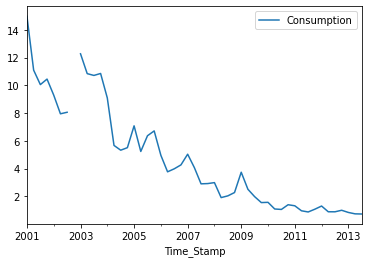

In [ ]:
df.plot()

#### fill the missing values using interpolation

In [ ]:
daily = df.resample('Q').mean()

df= daily.interpolate(method = 'linear')

In [ ]:
df.isnull().sum()

Consumption    0
dtype: int64

<AxesSubplot:xlabel='Time_Stamp'>

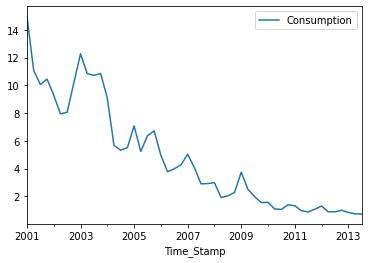

In [ ]:
df.plot()

#### decompose the given time series and give your inference on whether the series is additive or multiplicative

In [ ]:
df_add_decompose = seasonal_decompose(df, model = 'additive')

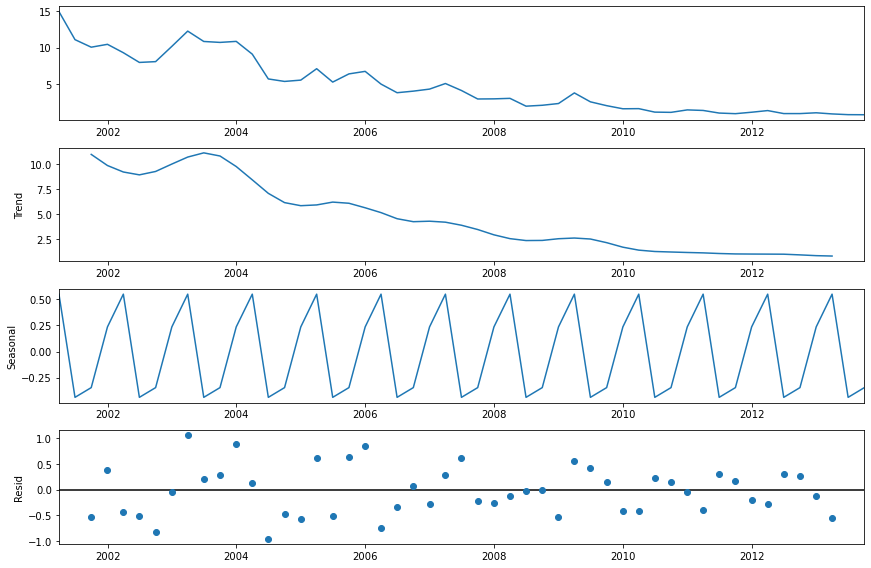

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
df_add_decompose.plot()
plt.show()

In [ ]:
df_mul_decompose = seasonal_decompose(df, model = 'multiplicative')

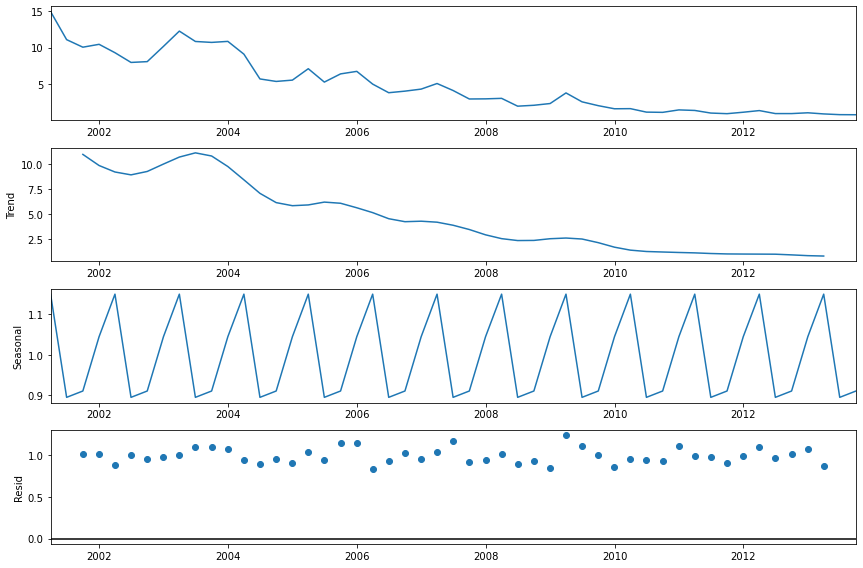

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
df_mul_decompose.plot()
plt.show()

#### from the residual plot, series seems to be multiplicative